In [30]:

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers
from tensorflow.keras import Model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
sc = StandardScaler()

In [31]:
data = pd.read_csv('D:\\RES\\Chemical\\verified_generated_reservoir2_data.csv')#, names=["Time (mts)","Outer diameter of drill pipes (mm)","Diameter of the bit (mm),Diameter of the stabilizer (mm)","Junk slot ratio (%)","Initial cutting volume fraction (%)","Internal friction angle of cuttings (◦)","Frictional coefficient between cuttings and drill string (dimensionless)","Frictional coefficient between cuttings and the wellbore (dimensionless)","Density of cuttings (kg/m3 )","Density of drilling fluid (kg/m3 )","Angle of repose of cuttings (◦)","Torque and drag frictional factor (dimensionless)","Pipe Sticking"])

In [32]:
print("Reservoir B")
data.describe()

Reservoir B


,Days,Length of drill pipe,Outer diameter of drill pipes (mm),Diameter of the bit (mm),Diameter of the stabilizer (mm),Junk slot ratio (%),Initial cutting volume fraction (%),Internal friction angle of cuttings (â—¦),Frictional coefficient between cuttings and drill string (dimensionless),Frictional coefficient between cuttings and the wellbore (dimensionless),Density of cuttings (kg/m3 ),Density of drilling fluid (kg/m3 ),Angle of repose of cuttings (â—¦),Torque and drag frictional factor (dimensionless),Pipe Sticking
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,252.000000,1102.500000,147.076936,222.119024,222.119024,51.883906,16.122593,32.361532,0.185206,0.176468,2703.106061,1911.558923,33.030471,0.270047,0.397306
std,85.880731,271.858936,1.092214,1.001803,1.001803,0.479741,0.603104,0.762764,0.007002,0.005789,17.208057,22.864993,0.583543,0.005070,0.490166
min,104.000000,634.000000,144.400000,219.700000,219.700000,51.000000,15.000000,31.000000,0.175400,0.165700,2671.000000,1871.000000,32.000000,0.260000,0.000000
25%,178.000000,868.250000,146.280000,221.520000,221.520000,51.460000,15.690000,31.692000,0.177900,0.171961,2693.400000,1895.800000,32.520000,0.266320,0.000000
50%,252.000000,1102.500000,147.433333,222.400000,222.400000,51.933333,16.136667,32.576667,0.185667,0.176378,2700.000000,1907.000000,33.033333,0.270767,0.000000
75%,326.000000,1336.750000,147.996296,222.896296,222.896296,52.247407,16.594444,33.061852,0.191700,0.178048,2712.370370,1931.259259,33.596296,0.273533,1.000000
max,400.000000,1571.000000,148.300000,223.400000,223.400000,52.740000,17.050000,33.210000,0.195400,0.188800,2743.000000,1951.000000,33.900000,0.279000,1.000000


In [33]:
X = data.iloc[1:,1:13].values
X

array([[ 637.1655405 ,  144.4309091 ,  219.7254545 , ..., 2671.309091  ,
        1871.309091  ,   32.00727273],
       [ 640.3310811 ,  144.4618182 ,  219.7509091 , ..., 2671.618182  ,
        1871.618182  ,   32.01454545],
       [ 643.4966216 ,  144.4927273 ,  219.7763636 , ..., 2671.927273  ,
        1871.927273  ,   32.02181818],
       ...,
       [1564.668919  ,  148.2965517 ,  223.3931034 , ..., 2742.534483  ,
        1950.775862  ,   33.89655172],
       [1567.834459  ,  148.3       ,  223.4       , ..., 2743.        ,
        1951.        ,   33.9       ],
       [1571.        ,  148.3       ,  223.4       , ..., 2743.        ,
        1951.        ,   33.9       ]])

In [34]:
Y = data.iloc[1:,14].values
#data['Result'].replace(['Positive','Negative'],[1,0],inplace=True)
Y

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [36]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=100,activation="relu"))
ann.add(tf.keras.layers.Dense(units=100,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1))

ann.compile(optimizer="adam",loss="binary_crossentropy")

In [38]:
Y_train = np.asarray(Y_train).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

In [39]:
ann.fit(X_train,Y_train,batch_size=32,epochs = 25)

Epoch 1/25
236/236 [==============================] - 0s 1ms/sample - loss: 1.9299
Epoch 2/25
236/236 [==============================] - 0s 47us/sample - loss: 0.8425
Epoch 3/25
236/236 [==============================] - 0s 30us/sample - loss: 0.7175
Epoch 4/25
236/236 [==============================] - 0s 38us/sample - loss: 0.6835
Epoch 5/25
236/236 [==============================] - 0s 38us/sample - loss: 0.6786
Epoch 6/25
236/236 [==============================] - 0s 38us/sample - loss: 0.6686
Epoch 7/25
236/236 [==============================] - 0s 38us/sample - loss: 0.6685
Epoch 8/25
236/236 [==============================] - 0s 44us/sample - loss: 0.6593
Epoch 9/25
236/236 [==============================] - 0s 34us/sample - loss: 0.6662
Epoch 10/25
236/236 [==============================] - 0s 30us/sample - loss: 0.6508
Epoch 11/25
236/236 [==============================] - 0s 34us/sample - loss: 0.6579
Epoch 12/25
236/236 [==============================] - 0s 34us/sample - los

In [40]:
plot = data.iloc[1:,1].values
plot

array([ 637.1655405,  640.3310811,  643.4966216,  646.6621622,
        649.8277027,  652.9932432,  656.1587838,  659.3243243,
        662.4898649,  665.6554054,  668.8209459,  671.9864865,
        675.152027 ,  678.3175676,  681.4831081,  684.6486486,
        687.8141892,  690.9797297,  694.1452703,  697.3108108,
        700.4763514,  703.6418919,  706.8074324,  709.972973 ,
        713.1385135,  716.3040541,  719.4695946,  722.6351351,
        725.8006757,  728.9662162,  732.1317568,  735.2972973,
        738.4628378,  741.6283784,  744.7939189,  747.9594595,
        751.125    ,  754.2905405,  757.4560811,  760.6216216,
        763.7871622,  766.9527027,  770.1182432,  773.2837838,
        776.4493243,  779.6148649,  782.7804054,  785.9459459,
        789.1114865,  792.277027 ,  795.4425676,  798.6081081,
        801.7736486,  804.9391892,  808.1047297,  811.2702703,
        814.4358108,  817.6013514,  820.7668919,  823.9324324,
        827.097973 ,  830.2635135,  833.4290541,  836.5

In [41]:
predict_test = (ann.predict(X_test)>0.5)
#predict_test

In [42]:
predict_test = (ann.predict(X))
predict_test
li=[]
for i in predict_test:
    for j in i:
        li.append(j)

li

[189.02092,
 189.34485,
 189.66872,
 189.99274,
 190.31662,
 190.64049,
 190.96445,
 191.28835,
 191.61224,
 191.93613,
 192.26003,
 192.5685,
 192.86722,
 193.15727,
 193.42099,
 193.68463,
 193.94847,
 194.21213,
 194.47574,
 194.73938,
 195.00313,
 195.26695,
 195.53055,
 195.79428,
 196.09033,
 196.39886,
 196.7073,
 197.01591,
 197.3242,
 197.63269,
 197.94128,
 198.24973,
 198.55827,
 198.8667,
 199.17526,
 199.48375,
 199.79216,
 200.10072,
 200.40918,
 200.71756,
 201.02612,
 201.33475,
 201.64523,
 201.95572,
 202.2662,
 202.57674,
 202.88716,
 203.19777,
 203.50822,
 203.81873,
 204.12926,
 204.43967,
 204.75026,
 205.0607,
 205.3712,
 205.65694,
 205.97684,
 206.29683,
 206.6167,
 206.93652,
 207.25647,
 207.57635,
 207.89627,
 208.21622,
 208.53606,
 208.86905,
 209.23618,
 209.60321,
 209.97032,
 210.3375,
 210.70453,
 211.07172,
 211.4389,
 211.80591,
 212.17294,
 212.5401,
 212.90714,
 213.27425,
 213.64136,
 214.00854,
 214.37564,
 214.7428,
 215.10982,
 215.47838,
 215

Text(0.5, 1.0, 'Pipe sticking probability with respect to length of drill')

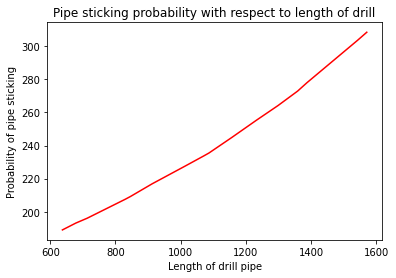

In [43]:
plt.plot(plot,li,color='r')
plt.xlabel("Length of drill pipe")
plt.ylabel("Probability of pipe sticking")
plt.title("Pipe sticking probability with respect to length of drill")

In [44]:
unique, counts = np.unique(predict_test, return_counts=True)
dict(zip(unique, counts))

{189.02092: 1,
 189.34485: 1,
 189.66872: 1,
 189.99274: 1,
 190.31662: 1,
 190.64049: 1,
 190.96445: 1,
 191.28835: 1,
 191.61224: 1,
 191.93613: 1,
 192.26003: 1,
 192.5685: 1,
 192.86722: 1,
 193.15727: 1,
 193.42099: 1,
 193.68463: 1,
 193.94847: 1,
 194.21213: 1,
 194.47574: 1,
 194.73938: 1,
 195.00313: 1,
 195.26695: 1,
 195.53055: 1,
 195.79428: 1,
 196.09033: 1,
 196.39886: 1,
 196.7073: 1,
 197.01591: 1,
 197.3242: 1,
 197.63269: 1,
 197.94128: 1,
 198.24973: 1,
 198.55827: 1,
 198.8667: 1,
 199.17526: 1,
 199.48375: 1,
 199.79216: 1,
 200.10072: 1,
 200.40918: 1,
 200.71756: 1,
 201.02612: 1,
 201.33475: 1,
 201.64523: 1,
 201.95572: 1,
 202.2662: 1,
 202.57674: 1,
 202.88716: 1,
 203.19777: 1,
 203.50822: 1,
 203.81873: 1,
 204.12926: 1,
 204.43967: 1,
 204.75026: 1,
 205.0607: 1,
 205.3712: 1,
 205.65694: 1,
 205.97684: 1,
 206.29683: 1,
 206.6167: 1,
 206.93652: 1,
 207.25647: 1,
 207.57635: 1,
 207.89627: 1,
 208.21622: 1,
 208.53606: 1,
 208.86905: 1,
 209.23618: 1,
 20

In [45]:
unique, counts = np.unique(Y_test, return_counts=True)
dict(zip(unique, counts))

{0.0: 35, 1.0: 25}

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
#print(confusion_matrix(Y_test,predict_test))
print(classification_report(Y_test,predict_test))

ValueError: Found input variables with inconsistent numbers of samples: [60, 296]

In [ ]:
print(ann.predict(sc.transform([[139.1,216.51,217.69,47.44,15.39,30.87,0.0976,0.2,2544.4,1708.57,31.73,0.163]])))

[[10785.932]]


In [ ]:
#ann.save_weights("model.h5")

In [ ]:
# serialize model to JSON
'''
model_json = ann.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    '''

'\nmodel_json = ann.to_json()\nwith open("model.json", "w") as json_file:\n    json_file.write(model_json)\n    '

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json

In [ ]:
# load json and create model
'''
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
'''


"\njson_file = open('model.json', 'r')\nloaded_model_json = json_file.read()\njson_file.close()\nloaded_model = model_from_json(loaded_model_json)\n"

In [ ]:
predict=loaded_model.predict(sc.transform([[143.9454545,219.0545455,219.0545455,48.81818182,12.97272727,27.88181818,0.159172727,0.169645455,2574.818182,1820,31.18181818,0.211909091]]))
if (predict>0.5):
    print("Pipe Sticking")
else:
    print("No pipe Sticking")

No pipe Sticking


In [ ]:
from ann_visualizer.visualize import ann_viz;

ann_viz(ann, title="My first neural network")

ModuleNotFoundError: No module named 'tensorflow.compat.v2'